In [2]:
import sys,os
add_path = os.path.abspath('../python')
if not add_path in sys.path:
    sys.path.append(add_path)
print(sys.path.index(add_path))

15


In [48]:
import matplotlib.pyplot as plt
%pylab inline
import time
import numpy as np
from numpy import vstack, hstack
from segbench import edgeNms2d,correspondPixels
from scipy import signal,misc
from scipy.io import loadmat, savemat
import scipy.ndimage as ndi
from scipy.ndimage import filters as filt
import fnmatch
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [49]:
files = list()
for fname in os.listdir('../../benchmark/NYU_GT/test/'):
    if fnmatch.fnmatch(fname, '*.mat'):
        files.append(os.path.splitext(os.path.split(fname)[1])[0])
print len(files)
def normalimg(E):
    return (E-E.min())/(E.max()-E.min())


654


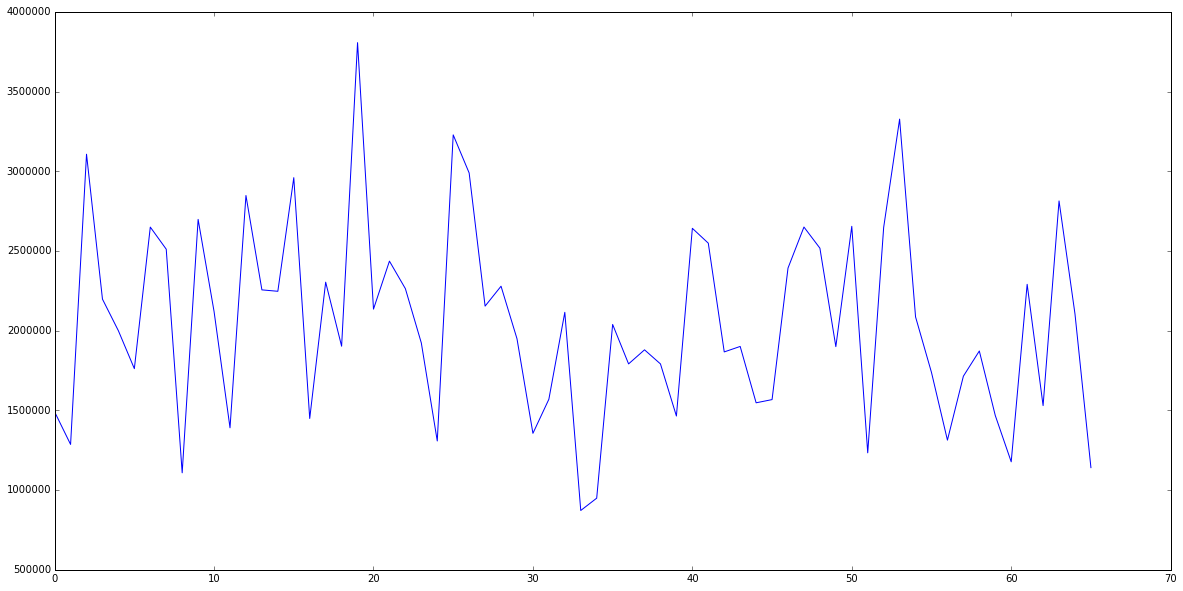

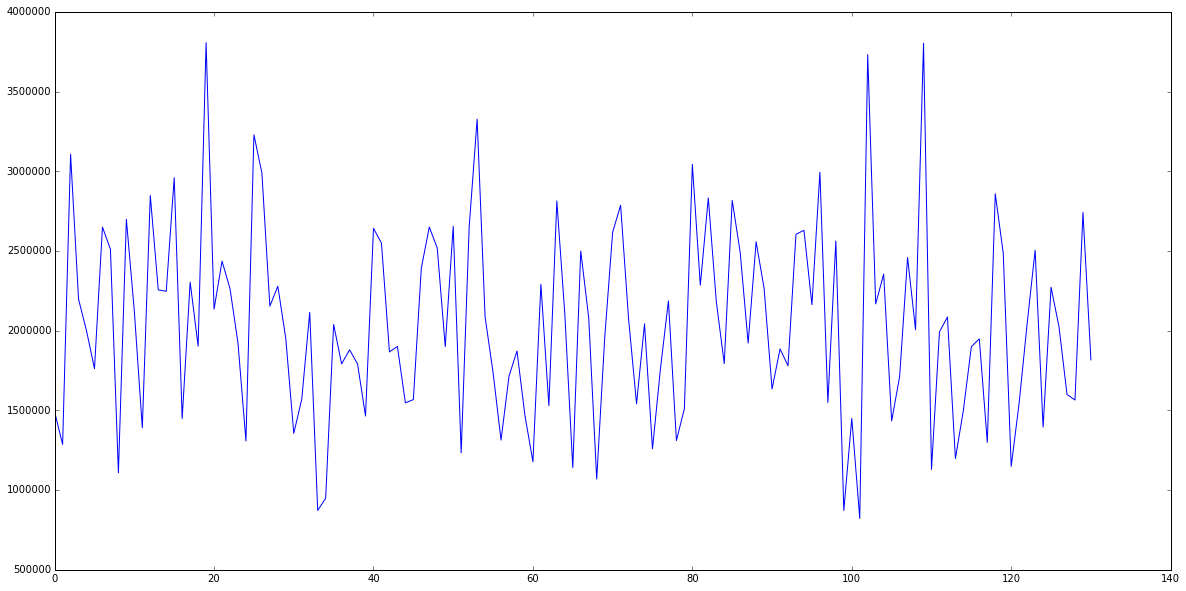

In [ ]:
thres = .5
costs = list()

for i,f in enumerate(files):
    fname = '../../benchmark/NYU_GT/test/'+f+'.mat'
    gtmat = loadmat(fname,struct_as_record=False,squeeze_me=True)
    gt = gtmat['groundTruth'].Boundaries
    imfname = '../../benchmark/nms_png/fcn_dsn_nyu_iter_20k_ensemble_dsn234/'+f+'.png'
    im = normalimg(imread(imfname))
#     plt.subplot(1,2,1)
#     plt.imshow(im>thres)
#     plt.subplot(1,2,2)
#     plt.imshow(gt>0)
#     plt.show()
    imo = np.array(im>.7,order='C').astype(float)
    gto = np.array(gt>0,order='C').astype(float)
    t = time.time()
    cost,oc,match1,match2 = correspondPixels(imo,gto,.0075)
#     print 'took {:.3f}s '.format(time.time() - t),
    costs.append(cost)
#     print i,(i%65),
    if (i%65)==0 and i>0:
        plt.plot(costs)
        plt.show()
# plt.plot(costs)
# plt.show()


In [20]:
plt.subplot(1,2,1)
plt.imshow(im>.7)
plt.subplot(1,2,2)
plt.imshow(gt>0)

In [ ]:
65%65==0

In [7]:
for i in range(0,5):
    t = time.time()
    cost,oc,match1,match2 = correspondPixels(imo,gto,.0075)
    print '{:.3f}s'.format(time.time() - t)
    print "cost:",cost,"oc:",oc

0.321s
cost: 1796134.62708 oc: 527.258534782
0.378s
cost: 1796147.65617 oc: 527.258534782
0.265s
cost: 1796132.32451 oc: 527.258534782
0.291s
cost: 1797182.40468 oc: 527.258534782
0.402s
cost: 1796134.43615 oc: 527.258534782


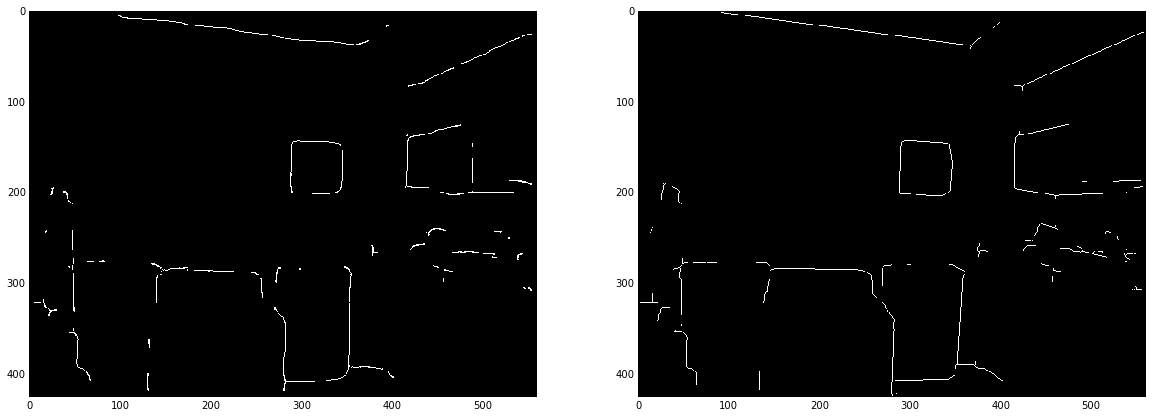

In [8]:
plt.subplot(1,2,1)
plt.imshow(match1,vmin=0,vmax=1)
plt.subplot(1,2,2)
plt.imshow(match2,vmin=0,vmax=1)

()


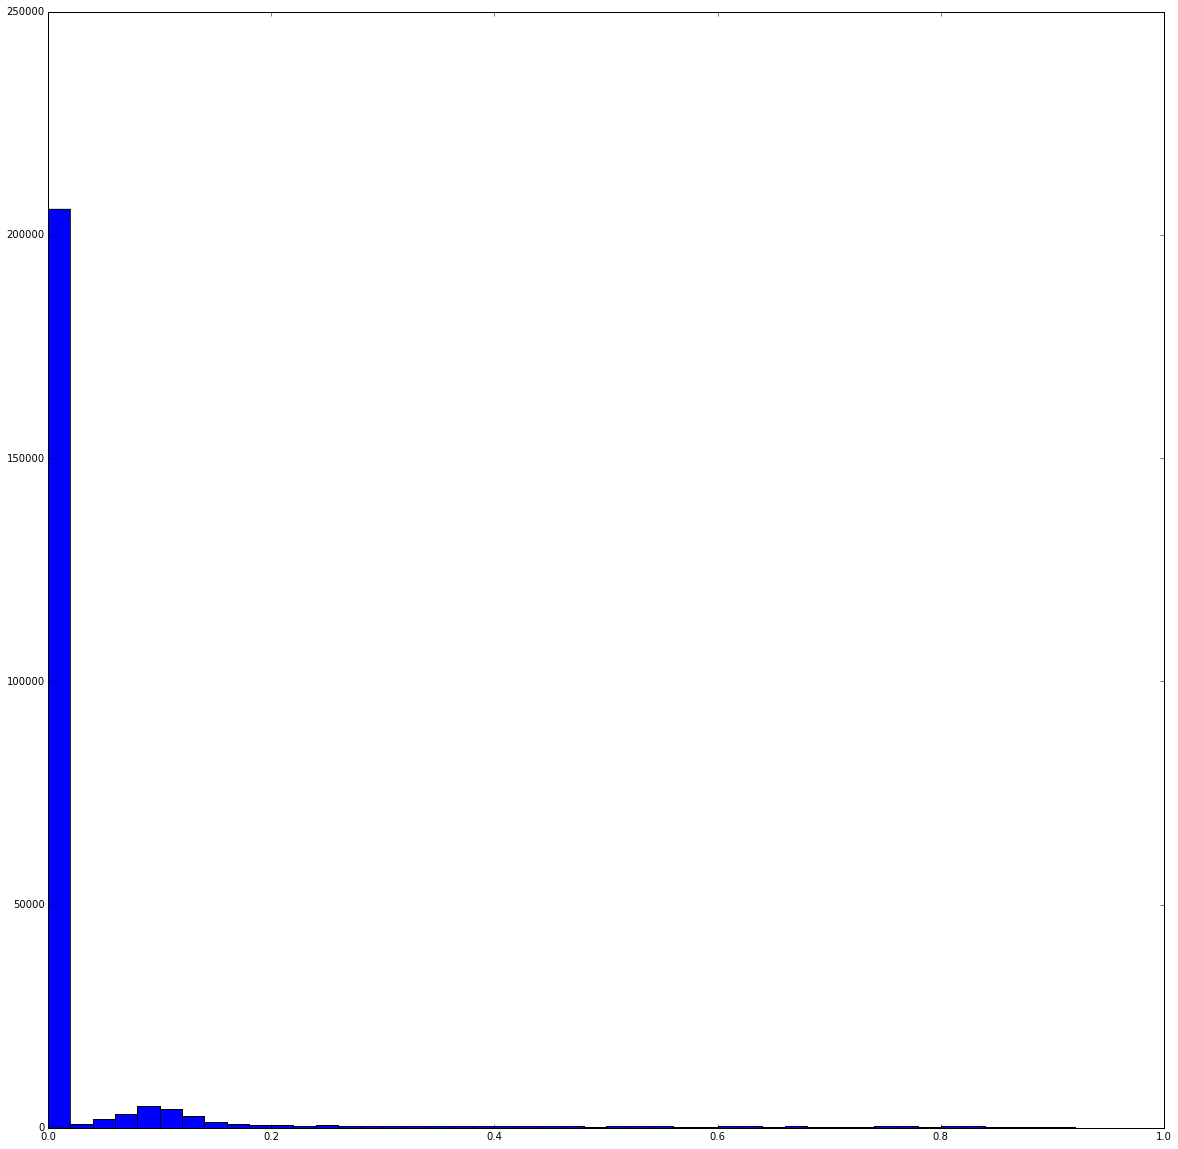

In [9]:
hist(im.ravel(),50)
print()